# Operations on a single qubit

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit.result import Result
from qiskit.quantum_info import Statevector, Operator
from math import sqrt, pi

### use vector_to_latex code from qiskit 0.44， make sure have the file vector_to_latex
from vector_to_latex import *

In [4]:
qc = QuantumCircuit(1)
qc.draw()

q:

the qubit is in state $ |0\rangle $ as we can see if we can see if we get its statevector

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

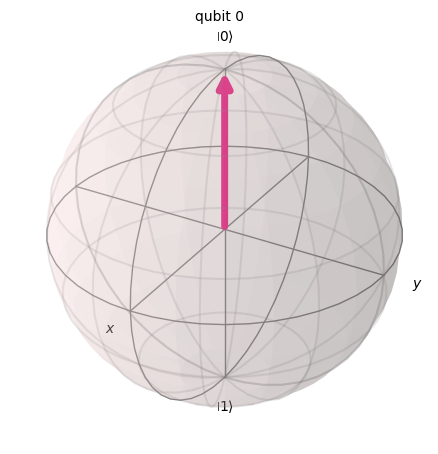

In [7]:
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

In [16]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

<IPython.core.display.Math object>

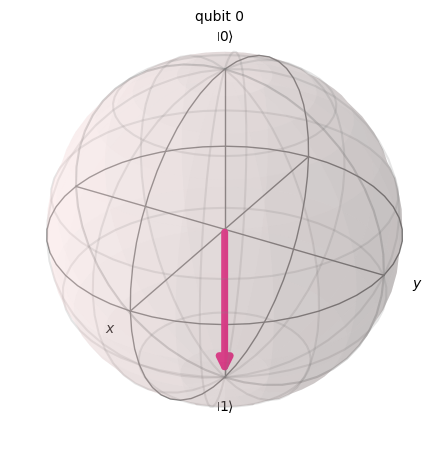

In [18]:
state = Statevector(qc)
display(Math(vector_to_latex(state)))
state.draw(output = 'bloch')


use the 'unitary simulator' backend instead of the statevector simulator

In [11]:
qc.draw()
unitary = Operator(qc).data
array_to_latex(unitary,prefix="X = ")

<IPython.core.display.Latex object>

┌───┐
q: ┤ H ├
   └───┘

<IPython.core.display.Math object>

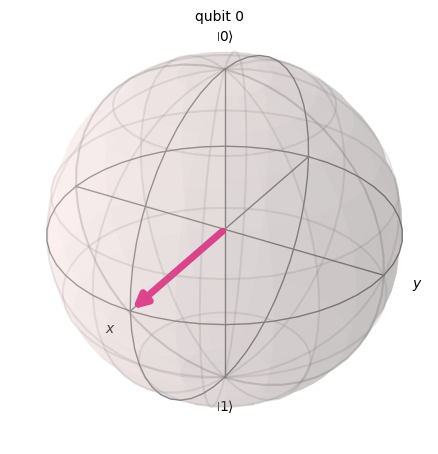

<IPython.core.display.Latex object>

In [26]:
###H gate 
qc = QuantumCircuit(1)
qc.h(0)
display(qc.draw())
state = Statevector(qc)
display(Math(vector_to_latex(state)))
display(state.draw(output='bloch'))
unitary = Operator(qc).data
display(array_to_latex(unitary,prefix="H ="))

There are also some simpler identities between the commonly used gates,for example $X = HZH$

In [27]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw()

┌───┐┌───┐┌───┐
q: ┤ H ├┤ Z ├┤ H ├
   └───┘└───┘└───┘

Here are other two physical gates available on the IBM hardware: $SX$ and $R_z(\phi)$.

$SX$ is a $\pi/2$ rotation around the $x$ axis so we can write $SX = \sqrt{X}$ because $SX~SX = X$ ,the $R_z(\phi)$ gate is rotating around the $z$ axis by a specified angle $\phi$.

┌────┐┌────┐
q: ┤ √X ├┤ √X ├
   └────┘└────┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

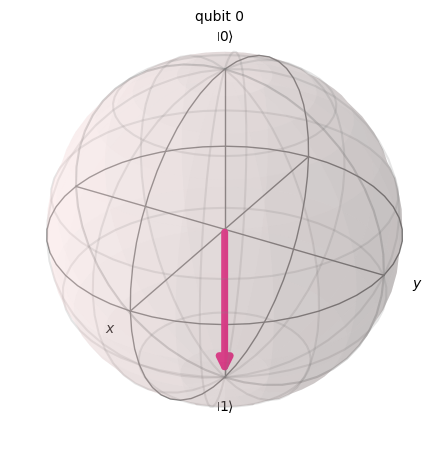

In [32]:
qc = QuantumCircuit(1)
qc.sx(0)
qc.sx(0)
display(qc.draw())
unitary = Operator(qc).data
display(array_to_latex(unitary,prefix="\\sqrt{X} \\sqrt{X} = X =")) ### SX is not equivalent to H
state = Statevector(qc)
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌─────────┐
q: ┤ Rz(π/2) ├
   └─────────┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

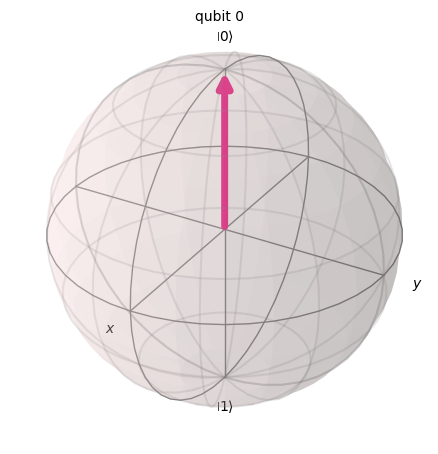

In [38]:
qc = QuantumCircuit(1)
qc.rz(pi/2,0)
display(qc.draw())
unitary = Operator(qc).data
display(array_to_latex(unitary, prefix="R_Z (\\pi/2) ="))
state = Statevector(qc)
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

this case we have applied a rotation around the $z$ axis to a state which is aligned to the $z$ axis, so the gate has changed to the global phase without making any difference observable. If we use $H$ gate to flip the state from $| 0 \rangle$ to $| + \rangle$ before, then we can observe the difference, because the relative phase between the $| 0\rangle$a and the $|1 \rangle$ changes between $|+ \rangle$ and $\circlearrowleft\rangle$

┌───┐┌─────────┐
q: ┤ H ├┤ Rz(π/2) ├
   └───┘└─────────┘

<IPython.core.display.Math object>

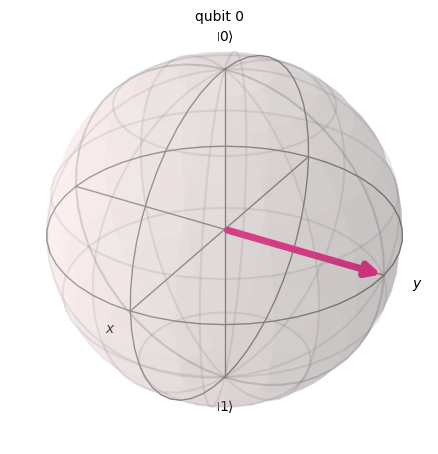

In [43]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(pi/2,0)
display(qc.draw())
state = Statevector(qc)
display(Math(vector_to_latex(state)))
display(state.draw(output='bloch'))

$H$ gate can be realized with a combination of $X$,$SX$, and $R_z$ gates, which are the physical gates available on the IBM quantum hardware:

$$
I= \begin{bmatrix} 0 & 1 \\ 1& 0 \end{bmatrix},
X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, 
SX = \frac{1}{2} \begin{bmatrix} 1+i & 1-i \\ 1-i & 1+i \end{bmatrix}, 
R_z(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

$$
H = R_z(\pi/2)SX = \begin{bmatrix}  1&0 \\ 0& i \end{bmatrix} \frac{1}{2}\begin{bmatrix} 1+i & 1-i \\ 1-i & 1+i \end{bmatrix}\begin{bmatrix}  1&0 \\ 0& i \end{bmatrix}    \equiv\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$ 
Also note that the $H$ can be more simply realized as $H = SY Z$ in which $SY = \sqrt{Y}$.

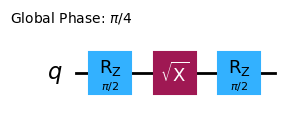

In [44]:
from qiskit import transpile
qc = QuantumCircuit(1)
qc.h(0)
new_qc = transpile(qc, basis_gates=['rz','sx','x','cx'])
new_qc.draw(output='mpl')

In fact any possible single-qubit operation can be expressed using those gates, including arbitary rotations around other axes.

┌───┐┌──────────┐┌─────────┐
q: ┤ H ├┤ Rz(-0.6) ├┤ Rx(1.6) ├
   └───┘└──────────┘└─────────┘

<IPython.core.display.Math object>

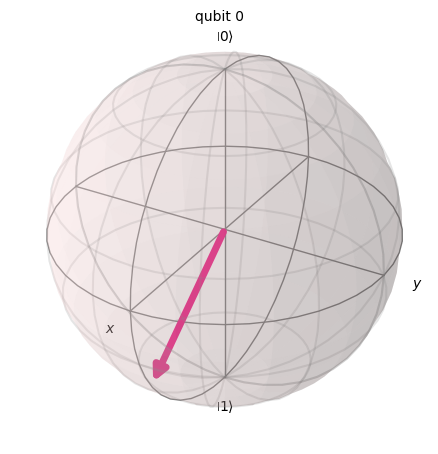

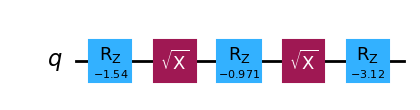

<IPython.core.display.Math object>

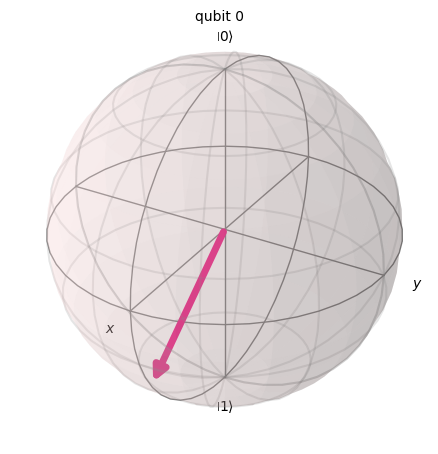

In [48]:
from qiskit import transpile
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(-0.6,0)
qc.rx(1.6,0)
display(qc.draw())
state = Statevector(qc)
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))
new_qc = transpile(qc, basis_gates=['rz', 'sx', 'x', 'cx'])
display(new_qc.draw(output="mpl"))
state = Statevector(new_qc)
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

# Measurement
Eventually we will want to read out the state of our qubit. But this measurement can only yield one of the computational basis state, $|0\rangle$ or $|1\rangle$. Alongside the qubit, we need to define
a classical bit in which we`ll store the measurement result

In [51]:
from qiskit_aer import Aer
qc = QuantumCircuit(1,1)  #the first 1 is one qubit,and the second 1 is the classical bit, and the measure operate can write the qubit result to classcial bit
display(qc.draw())
qc.measure(0,0)
display(qc.draw())

q: 
     
c: 1/

┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0

And of course the measurement has a 100% probability of giving $ |0\rangle $; we can either just print the result, or make the histogram. Only the non-zero results are returned

{'0': 1}


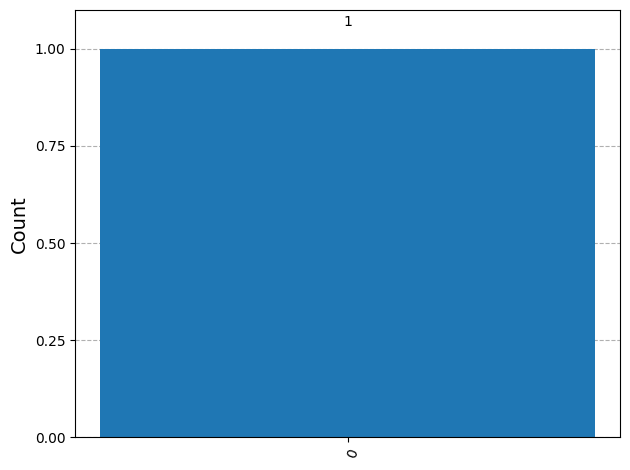

In [53]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc,shots=1.).result()
print(result.get_counts())
plot_histogram(result.get_counts())

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

{'0': 1}


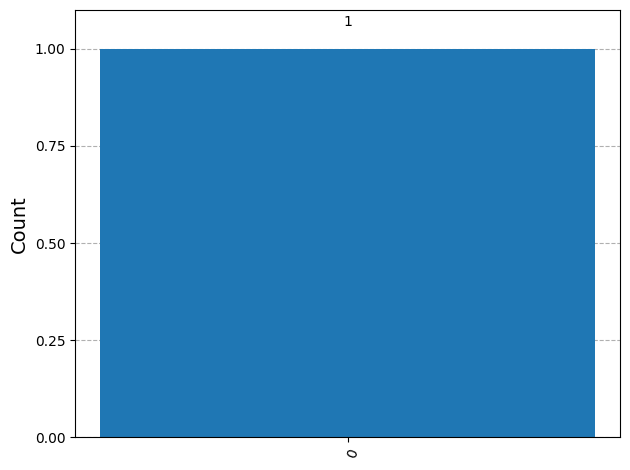

In [55]:
#add a Hadamard gate to put the qubit into a superposition
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(qc, shots=1).result()
print(result.get_counts())
plot_histogram(result.get_counts())

The result, however, is a definite $ |0\rangle $ or $ |1\rangle $. We just don't know which one we're going to get each time we run the circuit. But if we ran it lots of times we'd expect to get a 50-50 split. We can simulate this process:

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

{'1': 50, '0': 50}


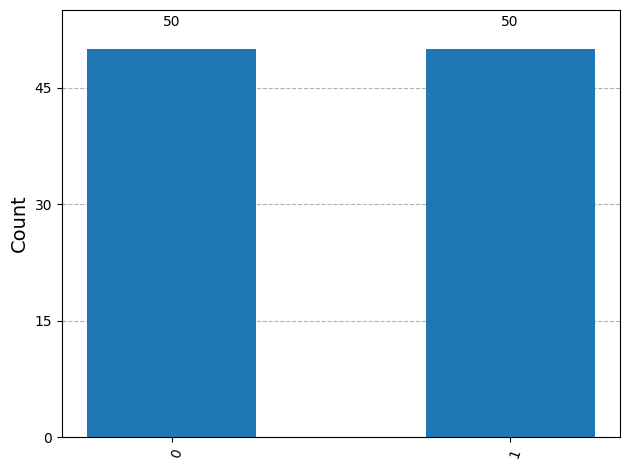

In [59]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(qc, shots=100).result()#result = backend.run(qc, shots=10).result()
print(result.get_counts())
plot_histogram(result.get_counts())

<IPython.core.display.Math object>

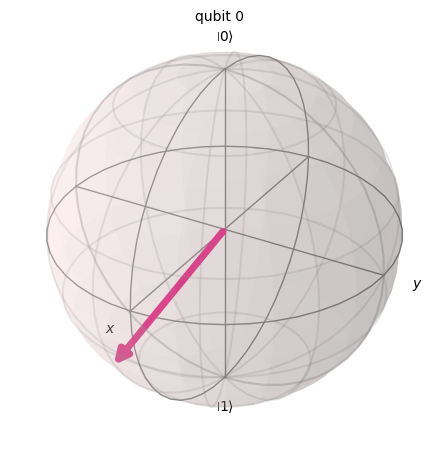

{'1': 807, '0': 193}


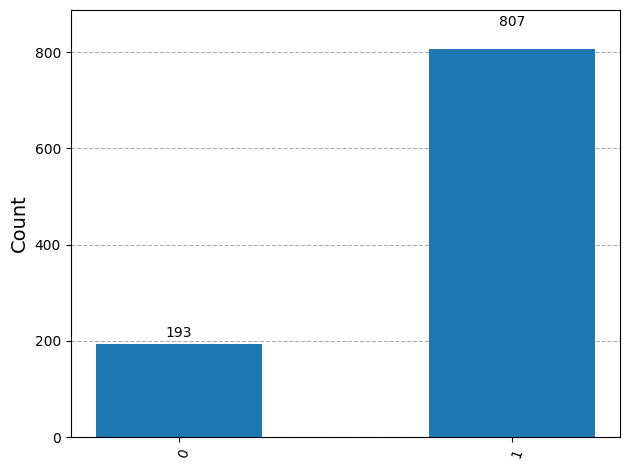

In [61]:
#some arbitrary final position of the state vector
qc = QuantumCircuit(1,1)
qc.h(0)
qc.rz(-0.25*pi,0)
qc.rx(0.35*pi,0)
state = Statevector(qc)
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))
qc.measure(0,0)
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(qc, shots=1000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

We don't actually have to add classical registers and perform measurements. Via the statevector simulator we can obtain the quasi-probabilities of the states, which are essentially the results we would get if we were to do that very many times:

<IPython.core.display.Math object>

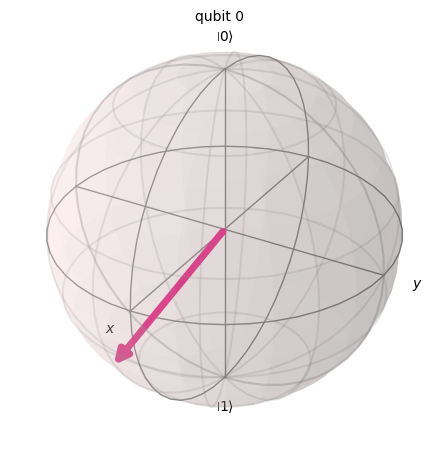

{np.str_('0'): np.float64(0.184981622332475), np.str_('1'): np.float64(0.815018377667525)}


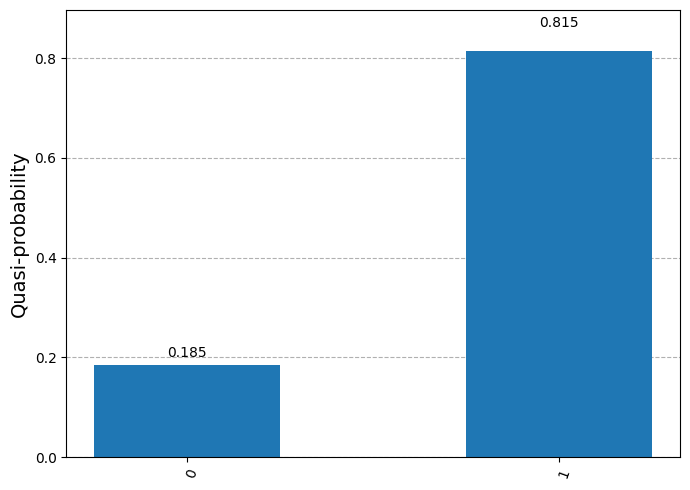

In [62]:
from qiskit.visualization import plot_distribution
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(-0.25*pi,0)
qc.rx(0.35*pi,0)
state = Statevector(qc)
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))
svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qc).result()
print(result.get_counts())
plot_distribution(result.get_counts())